<a href="https://colab.research.google.com/github/alyssasimons/detect-ai/blob/main/detect_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# load our dataset
df = pd.read_csv('daigt_external_dataset.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


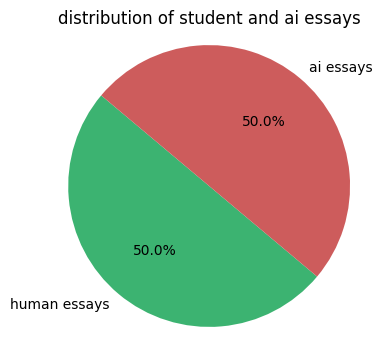

In [ ]:
# check class balance: the model will not be biased if the class is balanced
# check how many ai/human essays are in dataset
numberOfStudentEssays = df['text'].count()
numberOfAiEssays = df['source_text'].count()

labels = ['human essays', 'ai essays']
sizes = [numberOfStudentEssays, numberOfAiEssays]
colors = ['mediumseagreen', 'indianred']
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('distribution of student and ai essays')
plt.axis('equal')
plt.show()

# balanced!!! coooool!!

In [ ]:
# information about dataset
df.head()

,id,text,instructions,source_text
0,6060D28C05B6,Some schools in United States ofter classes fr...,\nTask: Write a persuasive essay on whether or...,\nWhen considering the pros and cons of attend...
1,60623DB5DE7A,"Four-day work week, a remarkable idea to conse...",\nTask: Research the advantages and disadvanta...,\nOne of the primary arguments for implementin...
2,607A39D981DE,Students and their families should consider an...,\nTask: \n\n1. Talk to your parents before tak...,\nBefore making any decisions about getting in...
3,60ACDFA1609E,Agree you will never grow if something beyond ...,\nTask: Write an essay discussing the benefits...,"\nRalph Waldo Emerson once said, ""Go confident..."
4,60AE13D3F07B,I think our character traits are formed by inf...,\nTask: Research and discuss how character tra...,\nHuman character traits are shaped by a wide ...


In [ ]:
# create variables for the columns
aiEssays = df['source_text']
studentEssays = df['text']

In [ ]:
# preprocessing our essays to clean them from noise (irrelevant data like punctuations, numbers, etc.,)
def preprocessingText(text):
    # remove symbols, numbers, and make the text lowercase
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower()
    # tokenize text (every word is now an item in a list)
    tokens = word_tokenize(text)
    # remove stop words (common words that have no significance)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# preprocess our essays
aiEssays = aiEssays.apply(preprocessingText)
studentEssays = studentEssays.apply(preprocessingText)

In [ ]:
# split dataset into training & testing sets
ai_train, ai_test = train_test_split(aiEssays, test_size=0.2, random_state=42)
student_train, student_test = train_test_split(studentEssays, test_size=0.2, random_state=42)

X_train = pd.concat([ai_train, student_train], ignore_index=True)
X_test = pd.concat([ai_test, student_test], ignore_index=True)
y_train = ['AI'] * len(ai_train) + ['STUDENT'] * len(student_train)
y_test = ['AI'] * len(ai_test) + ['STUDENT'] * len(student_test)

In [ ]:
X_train.head()

0    implementation school homework club could bene...
1    began journey school tried take advantage reso...
2    recently studied inspiring life former british...
3    use cell phone classroom become increasingly d...
4    strongly believe positive attitude key success...
dtype: object

In [ ]:
X_test.head()

0    argument whether teenager pm curfew revolves a...
1    come participating extracurricular activity li...
2    thought extending school day minute difficult ...
3    researching effect school program pair older y...
4    ralph waldo emerson famously wrote life journe...
dtype: object

In [ ]:
print(y_train)

['AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI

In [ ]:
print(y_test)

['AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI', 'AI

In [ ]:
# convert text into TF-IDF feature vectos
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# SVM classifier for text classification! initialize and train
# SVM is an algorithm that classifies text into various categories based on patterns (in this case AI or student)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# prediction on the testing set!
predictions = svm_classifier.predict(X_test_tfidf)

# testing our model
# preprocess the text of the new essays (essays are from kaggles llm comp in their train_essays.csv!)
# first essay is ai, second essay is student, third essay is student, fourth is ai, fifth is student!
testEssays = ["This essay will analyze, discuss and prove one reason in favor of keeping the Electoral College in the United States for its presidential elections. One of the reasons to keep the electoral college is that it is better for smaller, more rural states to have more influence as opposed to larger metropolitan areas that have large populations. The electors from these states are granted two votes each. Those from larger, more populated areas are granted just one vote each. Smaller states tend to hold significant power because their two votes for president and vice president add up more than the votes of larger states that have many electors. This is because of the split of the electoral votes. Some argue that electors are not bound to vote for the candidate who won the most votes nationally. They do not have to vote for their own state's nominee unless their state has a winner take all system. However, there are states that have adopted laws that force their electors to vote for their state's candidate. It seems that, no matter how, electors are not bound to vote for the candidate who won the most nationally. This is not always the case because of state legislatures who can overrule the electors and vote for the alternative candidate their citizens have selected for them, even if the voter lives in a state without a winner take all system.",
              "The majority of people use some sort of gas transportation such as a bus or a car. It is a good idea to limit the usage of gas transportation to help save our environment, to help our own health and to save money. Cars are very popular nowaday but are also bad for everyone and for the world we all live in. Limiting car use will be better for all of us. Car usage is extremely bad for our environment. According to the first article in paragraph five a total of about 62 percent of gas emission in our environment iin Europe and the United States are because of cars. That is lot, and to think that limiting the usage of cars or eliminating it will help better the environment and world we live in. As stated in the fourth article in paragraph 29 that every year our environment betters due to less people buying cars and getiing licenses. Health is a big issue everyone faces. The more cars our used the more contaminated the oxygen we breath gets. We can not afort to let the air we breath get contaminated. In the second article throughout the whole reading Robert Duffer the author says that in paris smog is everywere. That fog absorbs all the gas that the cars release. Think about it, that poluted fog is n the air and you can not help breathing it. Once you breath that fog you are putting your health at risk. Every car i money you have to waste out of your pocket. You waste money when you buy the car, when it breaks down, and even everytime the car is low on gas. If you put that all together you are wasting lost of money when you could be saving it and using on other things. In article one in paragraph two in the last sentence the author put how much money is wasted to be able to have a car which is about 40,000. Having a car means getting fines if you do something wrong or improperly as showed in paragraphs 11 and 21. In conclusion, cars are not good for the environment, our health, or for our money. Use cars less or do not use them at all. Everyone needs to end car use. Make a change, it is all up to you.",
              "Reducing the amount of cars used would benefit the fellow citizens greatly. Limiting car usage would decrease the amount of pollution in the air greatly, because they are among the main causes of emissions into the air among many countries. A better environment for the citizens would arise because the infrastructure of many cities would improve and the people would exercise more, therefore becoming healthier. Also, congestion would dramatically decrease because less people would be on the road which also leads to less car accidents so less people would be getting injured from a car accident. Car emissions all over the world are among the main causes for the air pollution and greenhouse gasses. In cities llike Paris the air pollution rose so much that there was a temporal driving ban on the whole city. This ban eventually cleared the air but if this could happen in one city it is more than likely to happen again in another city. These car emissions are clearly a large part of this air pollution as Elisabeth Rosenthal shows the U.S has a fifty percent of greenhouse gas emissions from the abundant amount of cars. Limiting the car usage would clearly diminish the amount of emissions in the air and prevent these large amounts of smog and pollution to form in the air that the people are breathing. In the city Bogota a carfree day was hosted to promote public transportation, and it had created many benefits to the city's infrastructure. With more money coming in from these public transportation the government has more money to fix and improve upon the city's infrastructure. The sidewalks were fixed, more restaurants were opened, and more people attended parks, and sports centers. If more cities implemented this carfree program for longer than a day the people would be becoming healthier and the environment would be a lot safer with better sidewalks, and better infrastructure in general. Also with these new buildings being created more jobs would naturally also be created therefore unemployment would also be decreasing in the cities that are restricting cars. In Vauban, a city almost no cars, the citizens live happy with a rectangular shape to their city to maintain everything close and a small walk away from almost everything, therefore the infrastructure for the city is clearly well built and no cars are needed. The restriction of cars would also make the roads a lot safer considering there are less cars to crash into or cause accidents. As shown from the Paris ban on cars, congestion had decreased sixty percent from what it was originally. The only people driving would be the conductors of the public transportation vehicles, therefore a majority of the drivers on the streets would be experienced and not be drunk while driving. The decrease in congestion would also lead to a much more efficient mode on transportation from the busses, and they would travel much faster to their destinations. With the restriction of car usage the positive benefits created would immensely improve the living conditions and environment that the citizens live in. With a cleaner environment free of pollution the people would live healthier, infrastructure would improve greatly allowing more jobs to be created as well, and less congestion and car accidents would occur in the cities. The restriction of car ussage would improve the citizen's lives greatly.",
              "This essay will analyze, discuss and prove one reason in favor of keeping the Electoral College in the United States for its presidential elections. One of the reasons to keep the electoral college is that it is better for smaller, more rural states to have more influence as opposed to larger metropolitan areas that have large populations. The electors from these states are granted two votes each. Those from larger, more populated areas are granted just one vote each. Smaller states tend to hold significant power because their two votes for president and vice president add up more than the votes of larger states that have many electors. This is because of the split of the electoral votes. Some argue that electors are not bound to vote for the candidate who won the most votes nationally. They do not have to vote for their own state's nominee unless their state has a winner take all system. However, there are states that have adopted laws that force their electors to vote for their state's candidate. It seems that, no matter how, electors are not bound to vote for the candidate who won the most nationally. This is not always the case because of state legislatures who can overrule the electors and vote for the alternative candidate their citizens have selected for them, even if the voter lives in a state without a winner take all system.",
              "Thick clouds of black smoke, and the smell of gasoline fills the air. overtime you breathe it's like your breathing poison. It's in your lungs and you cant get it out. This is our society today. Some people think that this issue is not a big deal, but in fact it is. But where is all this pollution coming from? The answer is simple, cars! Cars are the second leading polluter, in America. What these cars are doing are releasing a poisonous smog into the atmosphere, and we breathe it. Its not only killing us though, oh no. It is killing our one, our only, Earth. We are killing the only thing the human race has to live on, and for what? So we can save a couple minutes to get to work? This needs to stop. Why continue to use cars when their are so many more advantages not to use them? Without cars, or limiting the number of car usage we would save billions of dollars a year, be much more further into technology, and not only be saving lives, but saving our Earth. How much money would you say you spend on gas a week? Doesn't seem like all that much right? Now add the same thing again, and again, and again. By now you are probably in the hundreds. Now picture yourself with all of that in your hand. Thats all the money you have spent on something that is gone in almost an instant. Think about all the things you could buy with that money. Sounds nice right? Well why don't you just make it a reality than? You could save hundreds in hundreds of dollars in as little as one month! You could save even more by not even buying a car! than you'd be saving a ton of money. Plus youd be doing yourself a favor. You dont need to pay for gas, insurance, repairs or even the car. This is what people in not only America are doing but also in Columbia, Bogota, and one of the worlds most beautiful cities in the world, Paris. These people are bettering themselves, and their country. 'All of our world development since world war II has been sentered on the car' In German Suburb, Life Goes On Without Cars. Just think about how much more advanced of a society we could have without cars. So many things could be created that could save lives! A cure for cancer, a solution to end world hunger, new electronics, maybe even ways to reach past the ridges of our galaxy, yet somehow we still put our focus on something that is killing us, and the Earth. Sure theres some cool tech in these new Automobils but, the only reason people by cars are for new features, or better mpg, or as said by Mr. Sivak in The End of Car Culture , 'A car is just a means of getting from A to B', but thats all people really buy new cars, or use them for. If we wernt so focused on cars we would have new, and improved technology, and a lot more life changing discoveries. The Earth is dying. We are killing it, and ourselves. How much gasoline can your tank hold? the real question is how much gasoline can we put into the air we breathe? This smog and pollution is destroying some of the most beautiful scenes on earth. Paris, New York, and Bejing. However the usage of these automobils are not only killing us with pollution, but with auto accidents. So many of Americans have lost their lives due to wrecks, crashes, common stupidity, and deffects in the car itself. Whats even more sad is a lot of the time the person who has lost their life is not even at fault. A lot of times when driving people tend to get stressed out. road rage is a dangerous thing. In fact Heidrun Walter exclaimed his opinion on the subject by saying 'When I had a car I was always tense. I'm much happier this way.' in the article In German Suburb, Life Goes On Without Cars. A very, very effective solution to this problem is to ultimitly rid them from society. A simple distraction, a buzz, beep, ring, or crash, cound end up fatal, to anyone, and everyone who gets behind the wheel. Global warming, cancer, deathes, stress, and injuries, these are all things caused by vehicles. A common thing we all learn at a young age is to eliminate the problem at the source, and change starts with you, the reader, the average civilian can make a higher than life impact on society. Don't under estimate the power each individual holds when making a difference for good. Simple things like car pooling, walking, riding a bike, or public transportation, can all make a difference, for the better. so lets do it! lets make our environment cleaner. Our futures brighter, and our lives safer. Together we can acomplish this! we would have the advantages of saving billions of dollars a year to use for bigger and better things, be much more further into technology, and not only be saving lives, but saving our Earth, on our side."]

preprocessedTestEssays = [preprocessingText(essay) for essay in testEssays]

# preprocessed text -> TF-IDF feature vectors
testEssaystfidf = vectorizer.transform(preprocessedTestEssays)

# utilize the trained SVM classifier to predict whether new essays are AI or student generated
prediction = svm_classifier.predict(testEssaystfidf)

# prediction results
print("NOTE: JUST LIKE ANY OTHER AI DETECTION TOOL, THIS MAY NOT BE 100% ACCURATE")
for essay, label in zip(testEssays, prediction):
    print("ESSAY:", essay)
    print("PREDICTION:", label)

NOTE: JUST LIKE ANY OTHER AI DETECTION TOOL, THIS MAY NOT BE 100% ACCURATE
ESSAY: This essay will analyze, discuss and prove one reason in favor of keeping the Electoral College in the United States for its presidential elections. One of the reasons to keep the electoral college is that it is better for smaller, more rural states to have more influence as opposed to larger metropolitan areas that have large populations. The electors from these states are granted two votes each. Those from larger, more populated areas are granted just one vote each. Smaller states tend to hold significant power because their two votes for president and vice president add up more than the votes of larger states that have many electors. This is because of the split of the electoral votes. Some argue that electors are not bound to vote for the candidate who won the most votes nationally. They do not have to vote for their own state's nominee unless their state has a winner take all system. However, there a